# Hypothesentests

### DaLI &ndash; KI-Campus
#### Prof. Dr. Konrad Förstner, Prof. Dr. Richard Hirsch, 17. März 2022

In [1]:
import numpy as np

from matplotlib import pyplot as plt

In [2]:
th_red        = '#c81e0f'
th_orange     = '#ea5a00'
th_magenta    = '#b43092'
th_grey       = 'gray'
th_darkgrey   = 'darkgray'

## Wie schafft man Wissen?

### deduktiv

Neue Gesetzmäßigkeiten werden durch gültige *Schlussfolgerungen* aus bekannten abgeleitet.

### induktiv

Neue Erkenntnisse werden aus *wiederkehrenden Mustern* in Beobachtungen gewonnen.

#### Beispiel:
Es gibt einen Zusammenhang zwischen Tageszeit und Luftqualität in Köln.

## Problem bei der induktiven Methode

- Auffällige Muster können auch auf Zufall beruhen (Wolken) &mdash; im schlimmsten Fall sogar auf Einbildung (Aberglaube).
- In den Wissenschaften wurden Verfahren etabliert, um induktive Schlussfolgerungen auf die nötige Probe zu stellen.


- Es werden **Hypothesen** formuliert, die widerlegbar (*falsifizierbar*) sind.
- Mit **Hypothesentests** kann überprüft werden, wie belastbar die vermuteten Zusammenhänge sind.

## *Learning Outcomes*

- Sie lernen den prinzipiellen Ablauf einen Hypothesentests kennen,

- indem wir beispielhaft einen einfachen Test durchführen,

- damit Sie ein Gefühl dafür bekommen, was so ein Test leisten kann
  und wie man die Ergebnisse bewerten muss.

# Hypothesentests

## Vorgehen bei einem Hypothesentest
(nach Chow und Liu, 2008)

1. formuliere die **Nullhypothese**,
2. formuliere eine **Alternativhypothese**, die für die Forscher besonders interessant ist,
2. wähle eine **Teststatistik** und **Signifikanzniveau**,
3. bestimme die **Nullverteilung** der Teststatistik,
4. bestimme den **Annahme-** und **Ablehnungsbereich** für die Nullhypothese,
5. generiere eine Stichprobe (Studie bzw. Experiment durchführen),
6. berechne die Teststatistik,
7. ermittle das Ergebnis der Studie gemäß den Vorgaben aus Nr. 3 und 5.

## Nullhypothese

Es gibt **keinen** Unterschied zwischen der Feinstaubbelastung der Luft am Tag und in der Nacht.

## Alternativhypothese

### einseitig

Die Feinstaubbelastung der Luft ist am Tag **höher** als in der Nacht.

### zweiseitig

Die Feinstaubbelastung der Luft ist am Tag **höher oder geringer** als in der Nacht.

### Signifikanzniveau

Auch unter der Nullhypothese ist es &ndash; zumindest theoretisch &ndash; möglich, dass alle &ndash; oder fast alle &ndash; Beobachtungen positiv ausfallen. 

Man muss nun &ndash; vor dem Experiment &ndash; eine Wahrscheinlichkeit festlegen, bei der man nicht mehr bereit ist, das Ergebnis durch bloßen Zufall zu erklären; das ist das *Signifikanzniveau*.

Nach allgemeiner Übereinkunft gilt ein Signifikanzniveau von 5&#x2009;% als guter Kompromiss zwischen &mdash; ja, und das klären wir später.

In [3]:
α = 0.05

## Teststatistik

Anzahl der Tage im Beobachtungszeitraum, an denen die Feinstaubbelastung am Tag höher ist als in der Nacht.

## Nullverteilung

Unter der Nullhypothese (kein Effekt) beruhen die Ergebnisse **Verbesserung** bzw. **keine Verbesserung** nur auf Zufall.

Stellen wir uns vor, wir hätten $n$ Beobachtungen gemacht. Wieviele **Verbesserungen** erwarten wir (immer noch unter der Nullhypothese)?

Ungefähr die Hälfte, aber geht das genauer?

Die Antwort liefert uns die &hellip;

### Binomialverteilung

> Die [**Binomialverteilung**](https://de.wikipedia.org/wiki/Stochastisch_unabh%C3%A4ngige_Ereignisse) [&hellip;] 
> beschreibt die Anzahl der Erfolge in einer Serie von gleichartigen und 
> [unabhängigen](https://de.wikipedia.org/wiki/Stochastisch_unabh%C3%A4ngige_Ereignisse) Versuchen, die jeweils 
> genau zwei mögliche Ergebnisse haben [&hellip;].

Seite „Binomialverteilung“. In: Wikipedia – Die freie Enzyklopädie. Bearbeitungsstand: 4. November 2021, 17:11 UTC. URL: https://de.wikipedia.org/w/index.php?title=Binomialverteilung&oldid=216974685 (Abgerufen: 19. Dezember 2021, 16:01 UTC) 

In [4]:
from scipy.stats import binom

In [5]:
p = 0.5                # probability for positive outcome

#### Wahrscheinlichkeitsverteilung

Jede Beobachtung soll mit der Wahrscheinlichkeit $p$ ein bestimmtes Ergebnis zeitigen (positiv sein). Die Wahrscheinlichkeit dafür, dass bei $n$ Beobachtungen **genau** $k$ positiv sind, beträgt
$$ {n \choose k}\,p^k\, (1 - p)^{n - k} $$

Diese Werte können mit Hilfe der Funktion `pmf` (*probability mass function*) berechnen:

In [6]:
n = 12                 # number of observations
k = np.arange(n + 1)   # number of positive observations
                       # k in {0, 1, ..., n}

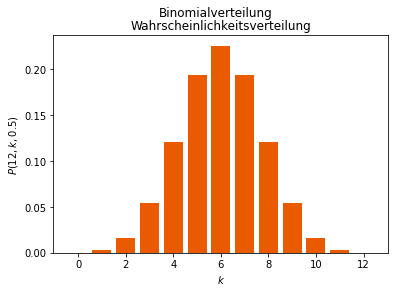

In [7]:
fig_pmf, ax_pmf = plt.subplots()
fig_pmf.suptitle('Binomialverteilung')

ax_pmf.set_title('Wahrscheinlichkeitsverteilung')
ax_pmf.set_xlabel('$k$')
ax_pmf.set_ylabel(f'$P({n}, k, {p})$')
ax_pmf.bar(k, binom.pmf(k, n, p), color = th_orange) # probability mass function
None

#### kumulative Verteilungsfunktion

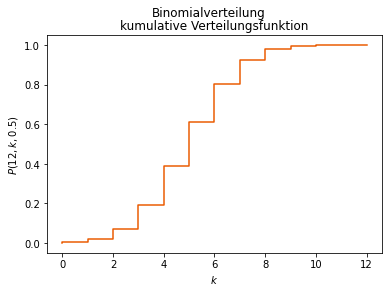

In [8]:
fig_cdf, ax_cdf = plt.subplots()
fig_cdf.suptitle('Binomialverteilung')

ax_cdf.set_title('kumulative Verteilungsfunktion')
ax_cdf.set_xlabel('$k$')
ax_cdf.set_ylabel(f'$P({n}, k, {p})$')
ax_cdf.step(k, binom.cdf(k, n, p), color = th_orange) # cumulative distribution function
None

#### Quantile

Für welches $k$ erreicht die kumulative Verteilungsfunktion einen bestimmten Wert?

(In der `scipy`-Bibliothek wird eine Quantile der Binomialverteilung mit der *percent point function* `ppf` berechnet.)

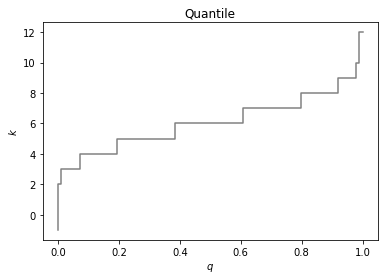

In [9]:
fig_ppf, ax_ppf = plt.subplots()

q = np.linspace(0, 1, 100)

ax_ppf.set_title('Quantile')
ax_ppf.set_xlabel('$q$')
ax_ppf.set_ylabel('$k$')
ax_ppf.step(q, binom. ppf(q, n, p), color=th_grey)  # percent point function
None

In [10]:
q_95 = binom.ppf(0.95, n, p)           # 95 % quantile
print(f'95 %-Quantile: {q_95:8.0f}')
print(f'erfasster Bereich: {100*binom.cdf(q_95, n, p):6.1f} %')

95 %-Quantile:        9
erfasster Bereich:   98.1 %


## Annahme und Ablehnungsbereich

In [11]:
n = 100
k = np.arange(30, 70)

### einseitige Fragestellung

In [12]:
k_1 = binom.ppf(1 - α, n, p)
print(f"Grenze zwischen Annahme- und Ablehnungsbereich (einseitig): {k_1}")

Grenze zwischen Annahme- und Ablehnungsbereich (einseitig): 58.0


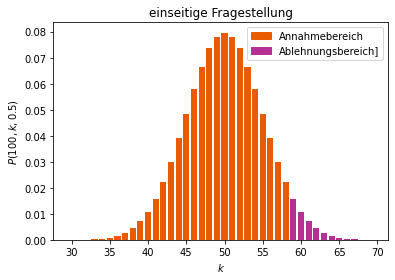

In [13]:
fig_rr1, ax_rr1 = plt.subplots()        # region of rejection

rr_labels  = [ 'Annahmebereich', 'Ablehnungsbereich]' ]
rr_handles = [ plt.Rectangle((0, 0), 1, 1, color=color) 
                  for color in [th_orange, th_magenta] ]

ax_rr1.set_title('einseitige Fragestellung')
ax_rr1.set_xlabel('$k$')
ax_rr1.set_ylabel(f'$P({n}, k, {p})$')
ax_rr1.bar(k, binom.pmf(k, n, p),
          color=[th_magenta if l > k_1 else th_orange for l in k])
ax_rr1.legend(rr_handles, rr_labels)
None

Ein Anteil von $\alpha$ der Beobachtungen fällt bei Gültigkeit der Nullhypothese in den Ablehnungsbereich.

### zweiseitige Fragestellung

In [14]:
k_2 = (binom.ppf(α/2, n, p), binom.ppf(1 - α/2, n, p))
print(f"Grenzen zwischen Annahme- und Ablehnungsbereich (zweiseitig): {k_2}")

Grenzen zwischen Annahme- und Ablehnungsbereich (zweiseitig): (40.0, 60.0)


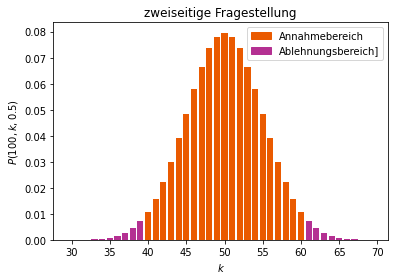

In [15]:
fig_rr2, ax_rr2 = plt.subplots()        # region of rejection

ax_rr2.set_title('zweiseitige Fragestellung')
ax_rr2.set_xlabel('$k$')
ax_rr2.set_ylabel(f'$P({n}, k, {p})$')
ax_rr2.bar(k, binom.pmf(k, n, p), label='Annahmebereich',
          color=[th_magenta if l < k_2[0] or l > k_2[1] else th_orange for l in k])
ax_rr2.legend(rr_handles, rr_labels)
None

Der Anteil von Beobachtungen, der bei Gültigkeit der Nullhypothese in den Ablehnungsbereich fällt, entspricht dem Signifikanzniveau $\alpha$.

## Ergebnis

### Prüfgröße im Ablehnungsbereich

1. Die **Nullhypothese trifft nicht zu** &ndash; es gibt einen echten Effekt. Der Test liefert ein **korrektes Ergebnis**.
2. Die **Nullhypothese trifft zu**! Die Prüfgröße ist durch Zufall im Ablehnungsbereich gelandet. Wir machen einen **Fehler 1.&nbsp;Art**.

Da wir die Größe des Fehlers 1.&nbsp;Art selbst und so festlegen können, dass wir mit dem falschen Ergebnis leben könnten, ist das in Ordnung.

Liegt die Nullhypothese im Ablehnungsbereich, lehnen wir sie auf dem gewählten Signifikanzniveau ab, (und gehen davon aus, dass es einen Effekt gibt.)

### Prüfgröße im Annahmebereich

1. Die **Nullhypothese trifft zu** &ndash; es gibt keinen echten Effekt. Der Test liefert ein **korrektes Ergebnis**.
2. Die **Nullhypothese trifft nicht zu**! Die Prüfgröße ist durch Zufall &ndash; trotz Effekt &ndash; im Annahmebereich gelandet. Wir machen einen **Fehler 2.&nbsp;Art**.

Da wir die Größe des Fehlers 2.&nbsp;Art nicht kennen, können wir keine Risikobewertung machen.

Liegt die Nullhypothese im Annahmebereich, können wir die Nullhypothese nicht ablehnen. Wir können sie aber auch nicht annehmen: Vielleicht gibt es ja tatsächlich einen Effekt, aber unser Experiment war nicht mächtig genug, ihn nachzuweisen.

Wir sind so klug als wie zuvor!

## Beispiel: Feinstaubbelastung in Köln

### Nullhypothese

Es gibt keinen Unterschied zwischen der Feinstaubbelastung in Köln am Tag und in der Nacht.

### Alternativhypothese (zweiseitige Fragestellung)

Es gibt einen Unterschied zwischen der Feinstaubbelastung in Köln am Tag und in der Nacht.

### Signifikanzniveau

In [16]:
α = 0.05

### Teststatistik

Anzahl der Tage, an denen die Feinstaubbelastung am Tag größer ist als in der Nacht.

### Nullverteilung

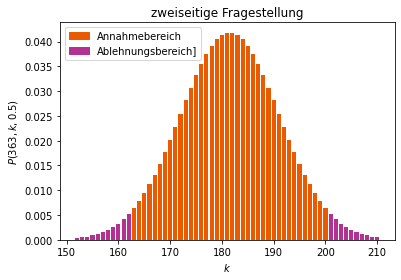

In [17]:
n = 363                 # number of observations
k = np.arange(binom.ppf(0.001, n, p), binom.ppf(0.999, n, p))

fig_rr2, ax_rr2 = plt.subplots()        # region of rejection
k_2 = (binom.ppf(α/2, n, p), binom.ppf(1 - α/2, n, p))

ax_rr2.set_title('zweiseitige Fragestellung')
ax_rr2.set_xlabel('$k$')
ax_rr2.set_ylabel(f'$P({n}, k, {p})$')
ax_rr2.bar(k, binom.pmf(k, n, p), label='Annahmebereich',
          color=[th_magenta if l < k_2[0] or l > k_2[1] else th_orange for l in k])
ax_rr2.legend(rr_handles, rr_labels)
None

Grenzen für den Ablehnungsbereich:

In [18]:
n = 151 + 212          # number of observations

limits = (binom.ppf(α/2, n, p), binom.ppf(1 - α/2, n, p))
limits

(163.0, 200.0)

### Ergebnis

Das Auslesen der Daten für die Feinstaubbelastungen um 3:00 Uhr (Nacht) und 15:00 Uhr (Tag) im Zeitraum vom 1. November 2020 bis 31. Oktober 2021 an der Messstation Köln-Rodenkirchen ergab folgendes Ergebnis (https://github.com/konrad/DaLI_Basismodul_WiSe2021_2022/blob/main/Feinstaub_Tag_vs_Nacht.ipynb)

```
     False    212
     True     151
```

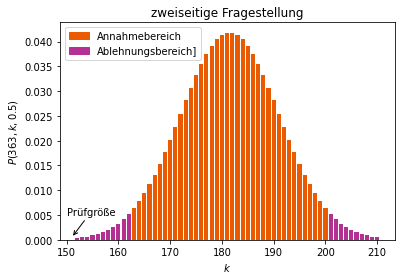

In [19]:
ax_rr2.annotate("Prüfgröße", xy = (151, 0.0005), xytext=(150, 0.005), 
                 arrowprops=dict(arrowstyle="->"))
fig_rr2

### Alternative Auswertung

Damit die Nullhypothese abgelehnt werden kann, muss der Wert der kumulativen Verteilungsfunktion (CDF) für die Ereignisse, die die Hypothese stützen (`True`), kleiner als $\alpha/2$ oder größer als $1 - \alpha/2$ sein (zweiseitige Fragestellung). 

Das Ergebnis ist &hellip;

In [20]:
binom.cdf(151, n, p)

0.0008005845014284349

Der Wert ist also kleiner als $\alpha/2$. Die Nullhypothese kann also auf dem 5&#x2009;%-Niveau abgelehnt werden. Die Feinstaubwerte am Tag und in der Nacht unterscheiden sich signifikant (auf dem 5&#x2009;%-Niveau).

## p-Wert

Viele Statistikprogramme geben als Ergebnis einen **p-Wert** aus.

Der $p$-Wert entspricht der Fläche unter dem Graphen der Wahrscheinlichkeitsdichte an den Enden jenseits der Prüfgröße.

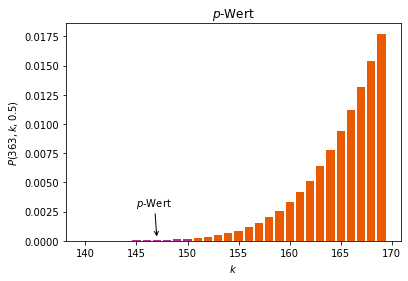

In [21]:
fig_p, ax_p = plt.subplots()

k = np.arange(140, 170)

ax_p.set_title('$p$-Wert')
ax_p.set_xlabel('$k$')
ax_p.set_ylabel(f'$P({n}, k, {p})$')
ax_p.bar(k, binom.pmf(k, n, p), 
            color=[th_magenta if l < 151 else th_orange for l in k])

ax_p.annotate("$p$-Wert", xy = (147, 0.0002), xytext=(145, 0.003), 
                 arrowprops=dict(arrowstyle="->"))
None

An der Grenze zwischen dem Annahme- und dem Ablehnungsbereich entspricht der $p$-Wert genau dem Signifikanzniveau. Je weiter die Prüfgröße in den Ablehnungsbereich fällt, desto kleiner wird der $p$-Wert.

Der Flächeninhalt unter dem Graphen der Wahrscheinlichkeitsfunktion entspricht dem Wert der [*cumulative density function*](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html) `cdf`. (Bei der zweiseitigen Fragestellung müssen wir das Ergebnis noch mit 2 multiplizieren, sehen Sie warum?)

In [22]:
p_value = 2*binom.cdf(151, 151 + 212, 1/2)
print(f"p-Wert:  {p_value:8.4}")

p-Wert:  0.001601


Liegt der $p$-Wert unter dem Signifikanzniveau&nbsp;$\alpha$, gilt das Ergebnis als statistisch signifikant.

In [23]:
if p_value <= α:
    print("Das Testergebnis ist statistisch signifikant.")
else:
    print("Das Testergebnis ist statistisch nicht signifikant.")

Das Testergebnis ist statistisch signifikant.


Man verwendet den $p$-Wert auch dazu, verschiedene Ausprägungen von 
[Signifikanz](https://xkcd.com/882/) zu definieren:

| $p$-Wert | Signifikanz | Sternchennotation |
| :--------: | :-----------: | :-----------------: |
| 0,1 &ndash; 1 | keine Signifikanz | (*kein Symbol*) |
| 0,05 &ndash; 0,1 | schwach signifikant | + |
| 0,01 &ndash; 0,05 | signifikant | * |
| 0,001 &ndash; 0,01 | sehr signifikant | ** |
| 0 &ndash; 0,001 | hoch signifikant | *** |

Aber Vorsicht bei der Interpretation des $p$-Wertes: Er ist als Ergebnis eines Experiments auch nur eine Zufallsgröße.  

**Auf keinen Fall darf er als die Wahrscheinlichkeit verstanden werden, mit der die Nullhypothese zutrifft!**

### *Jelly beans cause acne!*

https://xkcd.com/882/

## Kausalzusammenhänge

Aus dem Ergebnis eines Hypothesentests kann man noch nicht auf einen ursächlichen Zusammenhang zwischen den beobachteten Daten schließen. Wissenschaftlerinnen und Wissenschaftler können lediglich **Modelle** aufstellen.

Belastbare Modelle können nur aus *prospektiv* anglegten Studien/Experimenten gewonnen werden (***Challenge, Dechallenge, Rechallenge***). Prospektiv bedeutet, dass Nullhypothese, Alternativhypothese, Teststatistik und Signifikanzniveau vor der Datenerhebung festgelegt werden; (im Nachhinhein kann man auch aus Zufallsdaten signifikante Zusammenhänge herauslesen, s. o., [*Jelly beans cause acne!*](https://xkcd.com/882/)).

Die Modelle gelten dann solange als akzeptiert, bis neue Beobachtungen einem Modell widersprechen. Dann wird es in der Regel verfeinert.